In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
import random

In [36]:
class TimeSeriesPred:
    def __init__(self,dataframe,seq_len=10,output_file='predictions.csv'):
        self.df = dataframe
        self.a = dataframe
        self.seq_len = seq_len
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.Model = None
        self.X_train,y_train,X_test,y_test = None,None,None,None
        self.prediction,self.actual = None,None
        self.k = None
        self.output_file = output_file
    
    def preprocess_data(self):   
        self.a =  self.df[[	"Temperature1","Temperature2","Pressure1","Pressure2"]].copy()
        random.seed(42)
        l = [random.randint(0,1) for _ in range(self.a.shape[0])]
        
        self.a["Status"] = l    

        self.data_scaled = self.scaler.fit_transform(self.a)
        X,y = self.create_seq(self.data_scaled)   

        train_size = int(0.8*len(X))
        self.X_train,self.X_test = X[:train_size],X[train_size:]
        self.y_train,self.y_test = y[:train_size],y[train_size:]

    def create_seq(self,data):
        X,y = [],[]
        for i in range(len(data) - self.seq_len):
            X.append(data[i:i+self.seq_len,:])
            y.append(data[i+self.seq_len,:])

        return np.array(X),np.array(y)  
    
    def create_model(self):
        self.model = Sequential()
        self.model.add(LSTM(64,return_sequences = True,activation = 'tanh',input_shape = (self.X_train.shape[1],self.X_train.shape[2])))
        self.model.add(LSTM(64,activation = 'tanh'))
        self.model.add(Dense(self.a.shape[1]))
        self.model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['accuracy'])


    def train_model(self,epochs = 50,batch_size = 64):
        self.model.fit(self.X_train,self.y_train,epochs = epochs,batch_size = batch_size,validation_data = (self.X_test,self.y_test))
                                                                                         
    def predict(self):
        self.prediction = self.model.predict(self.X_test)
        self.prediction = self.scaler.inverse_transform(self.prediction)
        self.actual = self.scaler.inverse_transform(self.y_test)

        columns = [	"Temperature1","Temperature2","Pressure1","Pressure2","Status"]
        self.pred_df = pd.DataFrame(self.prediction, columns=columns)
        self.pred_df['Status'] = (self.pred_df['Status'] >= 0.5).astype(int)

        self.pred_df.to_csv(self.output_file,index = False)
        print(f"predictions saved to {self.output_file}")

    def plot_pred(self):
        columns = ["Temperature1", "Temperature2", "Pressure1", "Pressure2", "Status"]
        actual_df = pd.DataFrame(self.actual, columns=columns)

        plt.figure(figsize=(16, 16))

        for i, column in enumerate(columns):
            plt.subplot(len(columns), 1, i+1)
            plt.plot(actual_df[column], label='Actual ' + column, color='blue')
            plt.plot(self.pred_df[column], label='Predicted ' + column, color='orange')
            plt.title(column + ' (Actual vs Predicted)')
            plt.xlabel('Time Steps')
            plt.ylabel(column)
            plt.legend()
        plt.tight_layout()
        plt.show()

In [37]:
def main(input_csv_path,output_csv_path):
    
    #input_csv_path = 'your_data.csv'  
    #output_csv_path = 'predictions_output.csv'  
    df = pd.read_csv(input_csv_path)

    
    Pred = TimeSeriesPred(df, seq_len=10, output_file=output_csv_path)   
    Pred.preprocess_data()    
    Pred.create_model()    
    Pred.train_model(epochs=50, batch_size=64)      
    Pred.predict()    
    Pred.plot_pred()



Epoch 1/50


c:\Users\91995\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.3883 - loss: 0.1776 - val_accuracy: 0.4578 - val_loss: 0.0761
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3381 - loss: 0.1026 - val_accuracy: 0.4763 - val_loss: 0.0728
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3149 - loss: 0.0996 - val_accuracy: 0.4710 - val_loss: 0.0706
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3246 - loss: 0.0986 - val_accuracy: 0.4828 - val_loss: 0.0705
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3107 - loss: 0.0994 - val_accuracy: 0.4749 - val_loss: 0.0701
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3062 - loss: 0.0993 - val_accuracy: 0.5066 - val_loss: 0.0685
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3234 - loss: 0.1000 - val_accuracy: 0.4921 - val_loss: 0.0675
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3258 - loss: 0.0968 - val_accuracy: 0.4921 - val_loss: 0.0687
Ep

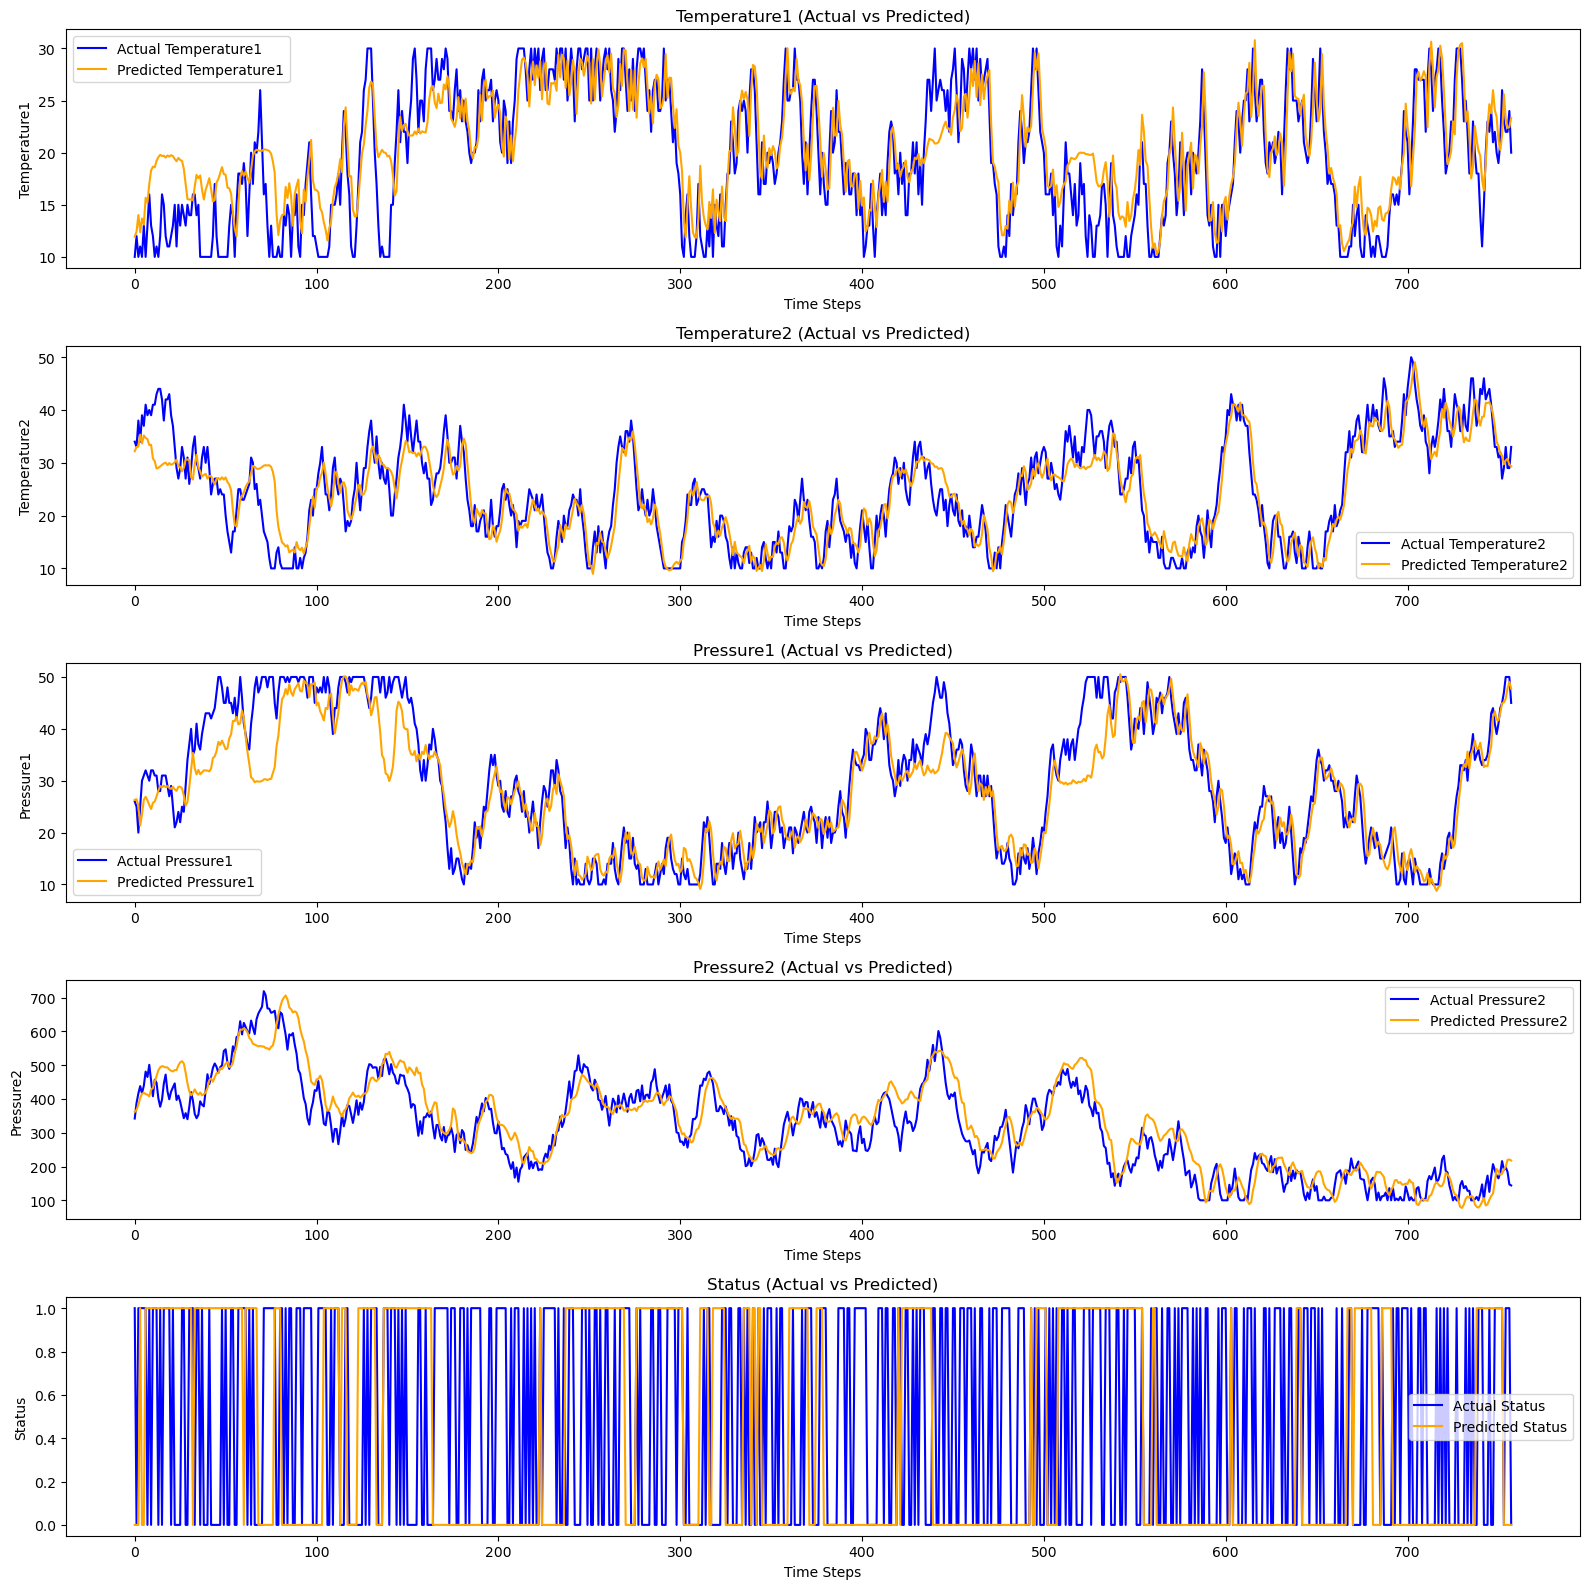

In [38]:
input_csv = 'machine_data.csv'
output_csv = 'predictions.csv'
if __name__ == "__main__":
    main(input_csv,output_csv)